# Organización de Datos

Trabajo Práctico N°1: TLC Trip Record Data 

Grupo 02 - 2C2024

Cátedra Ing. Rodriguez, Juan Manuel

In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Dataset: [estaciones meteorológicas de Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

| **Columna**       | **Significado**                                                                                     | **Unidades**              |
|-------------------|-----------------------------------------------------------------------------------------------------|---------------------------|
| Date              | Día del mes                                                                                         |                           |
| Location          | Lugar donde se tomó la observación                                                                  |                           |
| MinTemp           | Temperatura mínima en las 24 horas hasta las 9am                                                    | Grados Celsius            |
| MaxTemp           | Temperatura máxima en las 24 horas desde las 9am                                                    | Grados Celsius            |
| Rainfall          | Precipitación (lluvia) en las 24 horas hasta las 9am                                                | Milímetros                |
| Evaporation       | Evaporación en un "Class A" pan en las 24 horas hasta las 9am                                       | Milímetros                |
| Sunshine          | Horas de sol brillante en las 24 horas hasta la medianoche                                          | Horas                     |
| WindGustDir       | Dirección de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche                     | 16 puntos cardinales      |
| WindGustSpeed     | Velocidad de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche                     | Kilómetros por hora       |
| WindDir9am        | Dirección del viento promedio en los 10 minutos previos a las 9am                                   | Puntos cardinales         |
| WindDir3pm        | Dirección del viento promedio en los 10 minutos previos a las 3pm                                   | Puntos cardinales         |
| WindSpeed9am      | Velocidad promedio del viento en los 10 minutos previos a las 9am                                   | Kilómetros por hora       |
| WindSpeed3pm      | Velocidad promedio del viento en los 10 minutos previos a las 3pm                                   | Kilómetros por hora       |
| Humidity9am       | Humedad relativa a las 9am                                                                          | Porcentaje                |
| Humidity3pm       | Humedad relativa a las 3pm                                                                          | Porcentaje                |
| Pressure9am       | Presión atmosférica reducida al nivel del mar a las 9am                                             | Hectopascales             |
| Pressure3pm       | Presión atmosférica reducida al nivel del mar a las 3pm                                             | Hectopascales             |
| Cloud9am          | Fracción del cielo cubierto por nubes a las 9am                                                     | Octavos                   |
| Cloud3pm          | Fracción del cielo cubierto por nubes a las 3pm                                                     | Octavos                   |
| Temp9am           | Temperatura a las 9am                                                                               | Grados Celsius            |
| Temp3pm           | Temperatura a las 3pm                                                                               | Grados Celsius            |
| RainToday         | Indica si llovió o no ese día                                                                       | "Yes" o "No"              |
| RainTomorrow      | Indica si se espera lluvia para el día siguiente                                                    | "Yes" o "No"              |

# Cargamos el data set

In [54]:
df_weather = pd.read_csv('./datasets/raw/EJ2/weatherAUS.csv')

In [55]:
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [56]:
df_aus_coordinates = pd.read_excel('./datasets/raw/EJ2/aus_coordinates.xlsx')
df_aus_coordinates.head()

,Region,Location,Coordinates
0,Australia Meridional,Adelaide,"(-34.9285, 138.6007)"
1,Queensland,Albany,"(-35.0275, 117.8847)"
2,Nueva Gales del Sur,Albury,"(-36.0737, 146.9135)"
3,Territorio del Norte,AliceSprings,"(-23.6980, 133.8807)"
4,Nueva Gales del Sur,BadgerysCreek,"(-33.9209, 150.7738)"


Para el Grupo 02:<br>
Seleccionamos las regiones 'Nuevo Gales del Sur' y 'Victoria'.

In [57]:
df_aus_coordinates = df_aus_coordinates[df_aus_coordinates['Region'].isin(['Nueva Gales del Sur', 'Victoria'])]
df_aus_coordinates.head()

,Region,Location,Coordinates
2,Nueva Gales del Sur,Albury,"(-36.0737, 146.9135)"
4,Nueva Gales del Sur,BadgerysCreek,"(-33.9209, 150.7738)"
5,Victoria,Ballarat,"(-37.5622, 143.8503)"
6,Victoria,Bendigo,"(-36.7570, 144.2794)"
10,Nueva Gales del Sur,Cobar,"(-31.4996, 145.8380)"


In [58]:
df_weather = pd.merge(df_weather, df_aus_coordinates, how='inner', on='Location')
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Region,Coordinates
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,Nueva Gales del Sur,"(-36.0737, 146.9135)"
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,Nueva Gales del Sur,"(-36.0737, 146.9135)"
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,Nueva Gales del Sur,"(-36.0737, 146.9135)"
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,Nueva Gales del Sur,"(-36.0737, 146.9135)"
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,Nueva Gales del Sur,"(-36.0737, 146.9135)"


# Exploración Inicial

In [59]:
df_weather.shape

(74492, 25)

In [60]:
df_weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Region', 'Coordinates'],
      dtype='object')

In [61]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74492 entries, 0 to 74491
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           74492 non-null  object 
 1   Location       74492 non-null  object 
 2   MinTemp        73401 non-null  float64
 3   MaxTemp        73551 non-null  float64
 4   Rainfall       72369 non-null  float64
 5   Evaporation    42528 non-null  float64
 6   Sunshine       35954 non-null  float64
 7   WindGustDir    68945 non-null  object 
 8   WindGustSpeed  68951 non-null  float64
 9   WindDir9am     68206 non-null  object 
 10  WindDir3pm     72062 non-null  object 
 11  WindSpeed9am   73517 non-null  float64
 12  WindSpeed3pm   72893 non-null  float64
 13  Humidity9am    72949 non-null  float64
 14  Humidity3pm    72355 non-null  float64
 15  Pressure9am    67118 non-null  float64
 16  Pressure3pm    67163 non-null  float64
 17  Cloud9am       48166 non-null  float64
 18  Cloud3

## Variables Categóricas

In [62]:
categorical = df_weather.select_dtypes(include='object').columns
categorical = categorical.delete(0)
categorical

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow', 'Region', 'Coordinates'],
      dtype='object')

In [63]:
df_weather[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Region,Coordinates
0,Albury,W,W,WNW,No,No,Nueva Gales del Sur,"(-36.0737, 146.9135)"
1,Albury,WNW,NNW,WSW,No,No,Nueva Gales del Sur,"(-36.0737, 146.9135)"
2,Albury,WSW,W,WSW,No,No,Nueva Gales del Sur,"(-36.0737, 146.9135)"
3,Albury,NE,SE,E,No,No,Nueva Gales del Sur,"(-36.0737, 146.9135)"
4,Albury,W,ENE,NW,No,No,Nueva Gales del Sur,"(-36.0737, 146.9135)"


- Valores únicos en las variables categóricas

In [64]:
df_weather[categorical].nunique()

Location        25
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
Region           2
Coordinates     25
dtype: int64

- Graficos

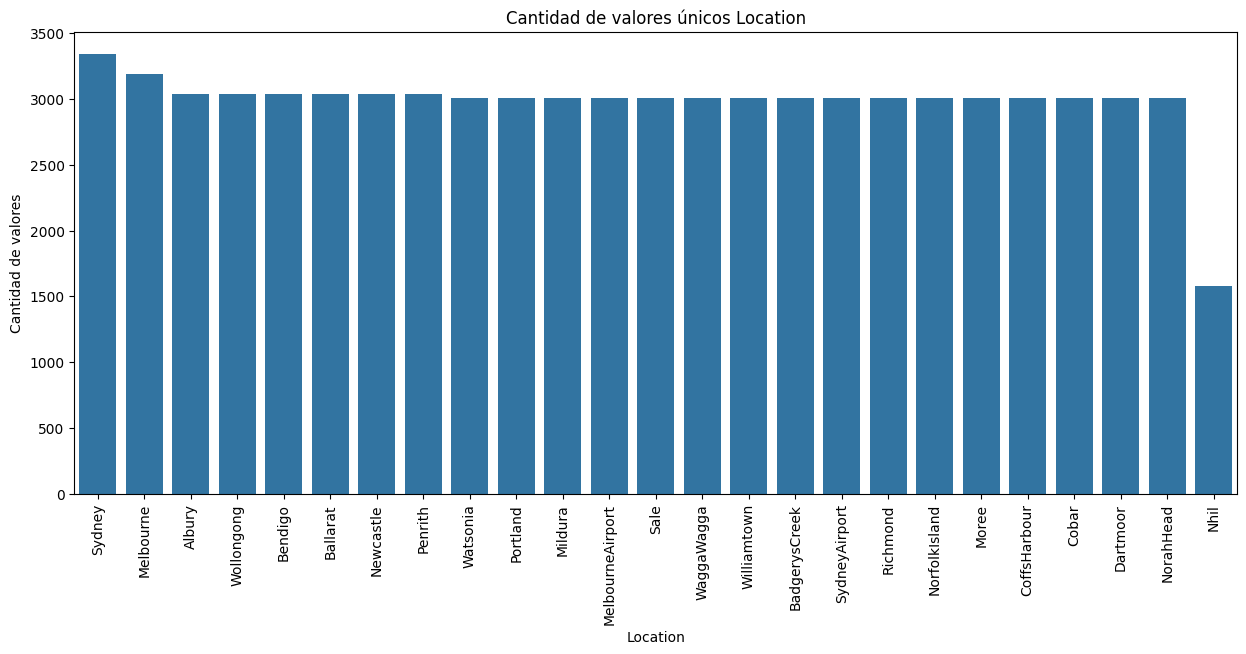

In [65]:
plt.figure(figsize=(15, 6))

sns.barplot(x=df_weather["Location"].value_counts().index, y=df_weather["Location"].value_counts().values)

plt.title("Cantidad de valores únicos Location")
plt.ylabel("Cantidad de valores")
plt.xlabel("Location")

plt.xticks(rotation=90)
plt.show()


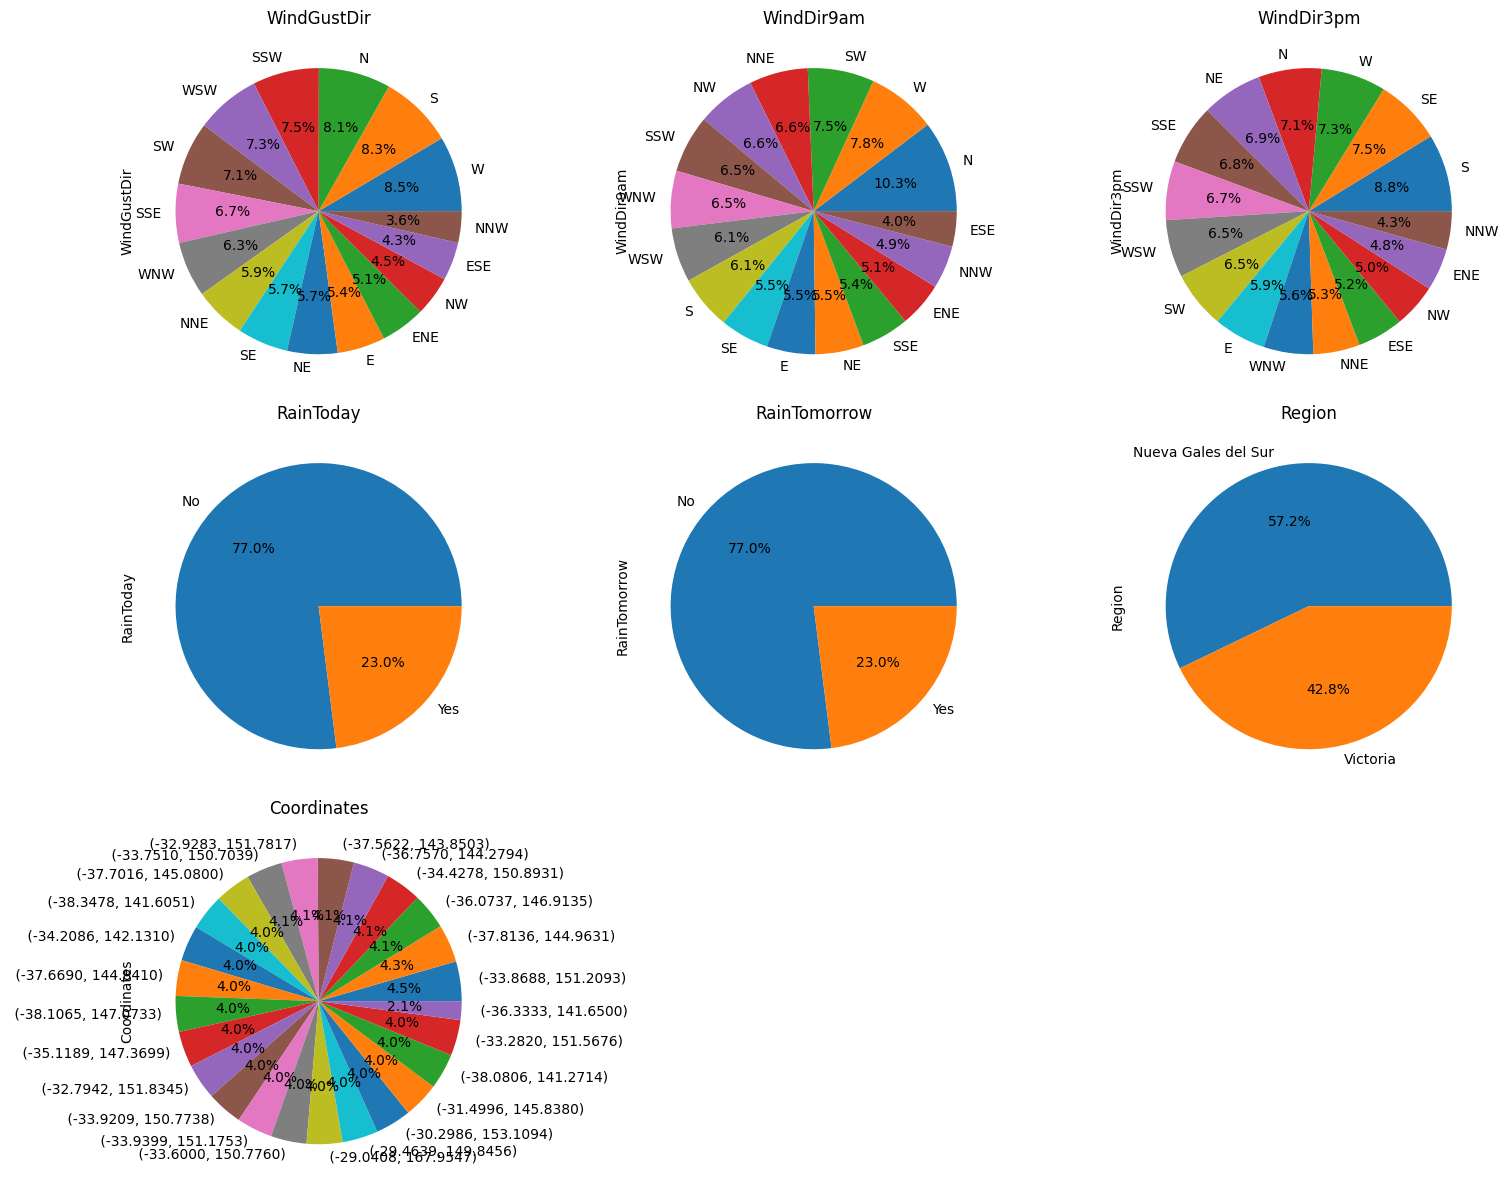

In [66]:
categorical_filtered = [col for col in categorical if col != 'Location']

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_filtered, 1):
    plt.subplot(3, 3, i)
    df_weather[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(col)

plt.tight_layout()
plt.show()

## Variables Numéricas

In [67]:
numerical = df_weather.select_dtypes(include='number').columns
numerical

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

- Estadisticas y Distribuciones

In [68]:
df_weather[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,73401.000000,73551.000000,72369.000000,42528.000000,35954.000000,68951.000000,73517.000000,72893.000000,72949.000000,72355.000000,67118.000000,67163.000000,48166.000000,47334.000000,73390.000000,72781.000000
mean,11.757881,22.543714,2.335903,5.036990,7.146985,40.142870,14.059809,18.716214,71.795638,52.911423,1018.173842,1015.938791,4.710543,4.785271,16.127699,21.052599
std,5.746111,6.553097,8.127033,4.056227,3.879089,14.311925,9.352097,9.375796,17.877189,20.545659,7.162155,7.054910,2.888130,2.675554,5.661870,6.369763
min,-5.600000,4.600000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-1.000000,1.700000
25%,7.500000,17.700000,0.000000,2.400000,4.100000,30.000000,7.000000,11.000000,60.000000,38.000000,1013.400000,1011.200000,1.000000,2.000000,11.900000,16.400000
50%,11.700000,21.900000,0.000000,4.000000,7.800000,39.000000,13.000000,19.000000,73.000000,53.000000,1018.300000,1016.100000,6.000000,6.000000,16.100000,20.400000
75%,16.200000,26.700000,0.800000,6.800000,10.300000,48.000000,19.000000,24.000000,86.000000,67.000000,1023.000000,1020.700000,7.000000,7.000000,20.400000,25.000000
max,31.900000,47.300000,371.000000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1037.800000,9.000000,8.000000,37.700000,46.700000


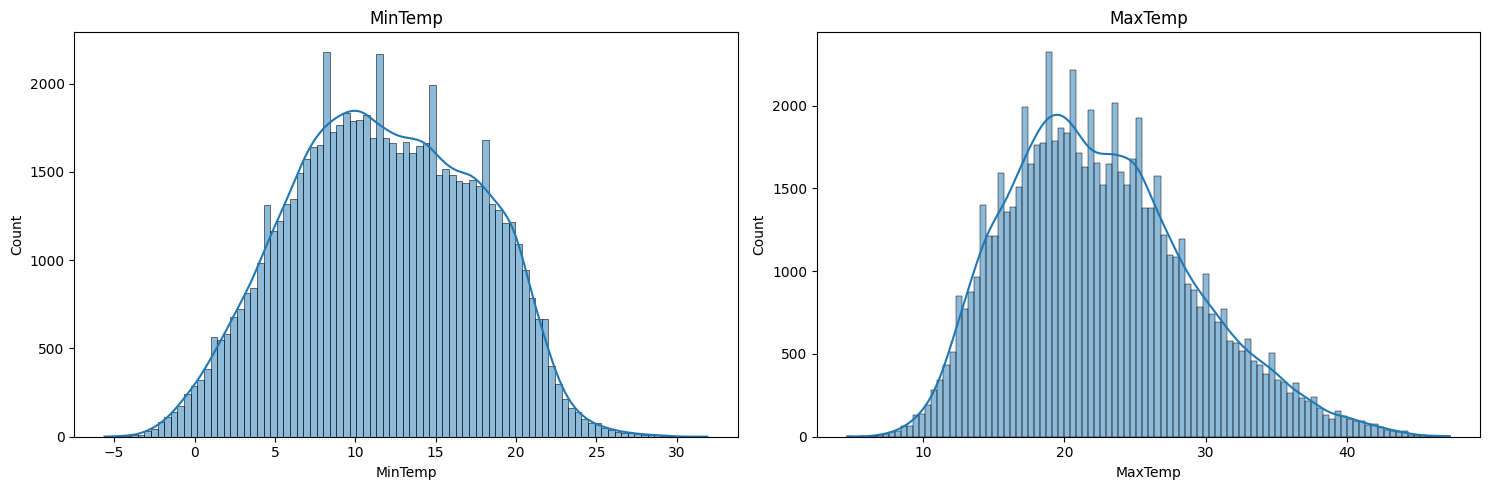

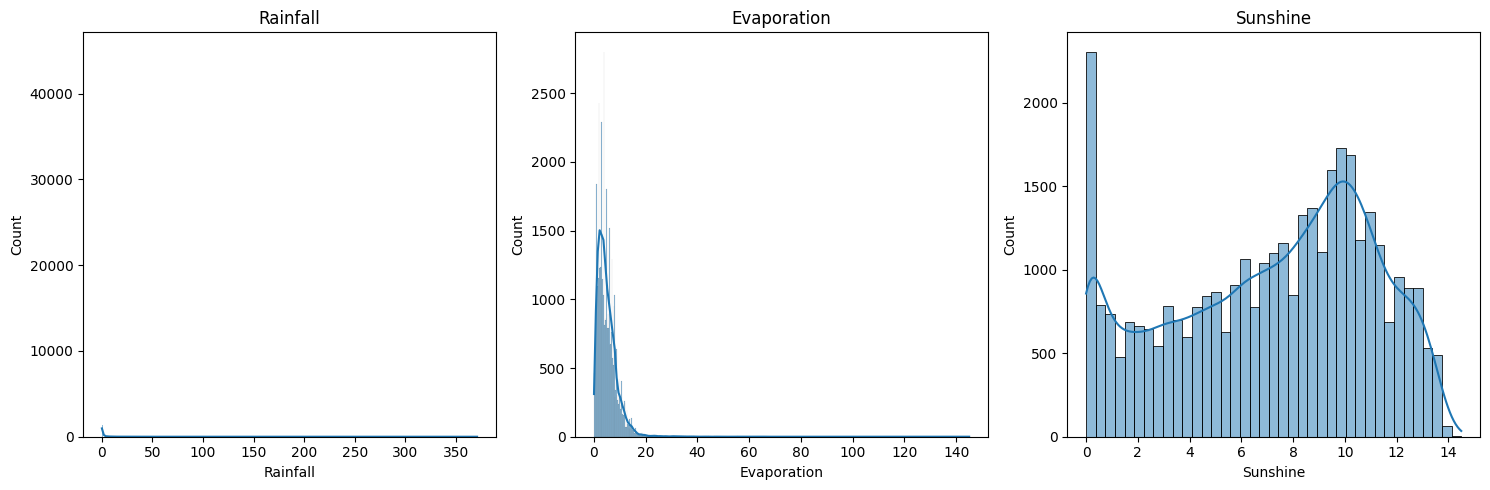

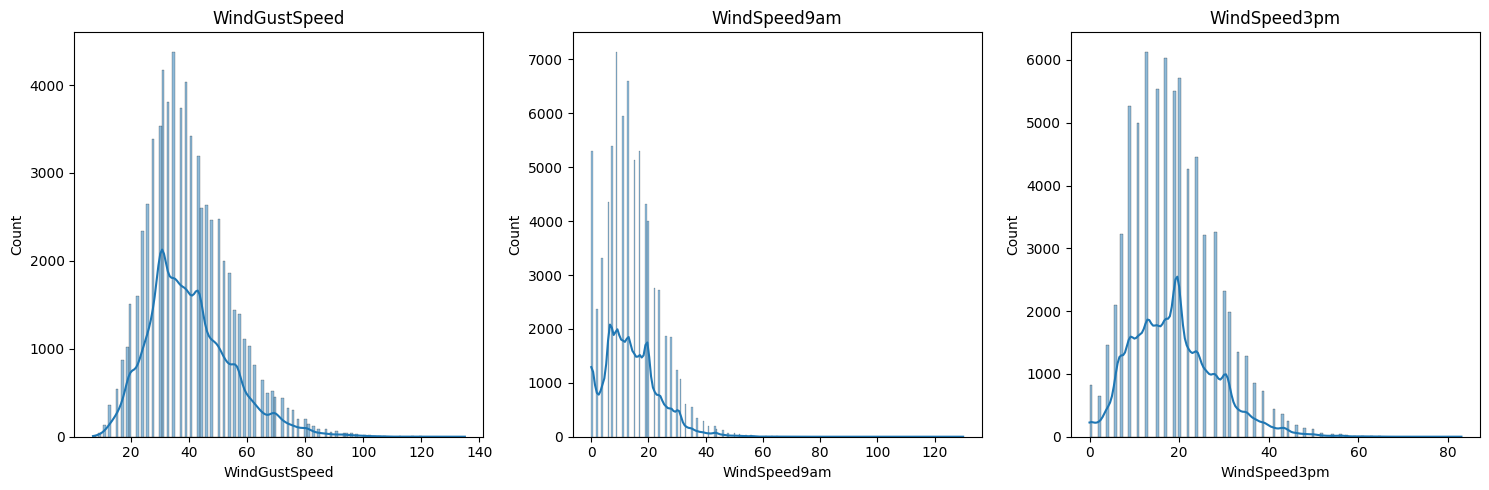

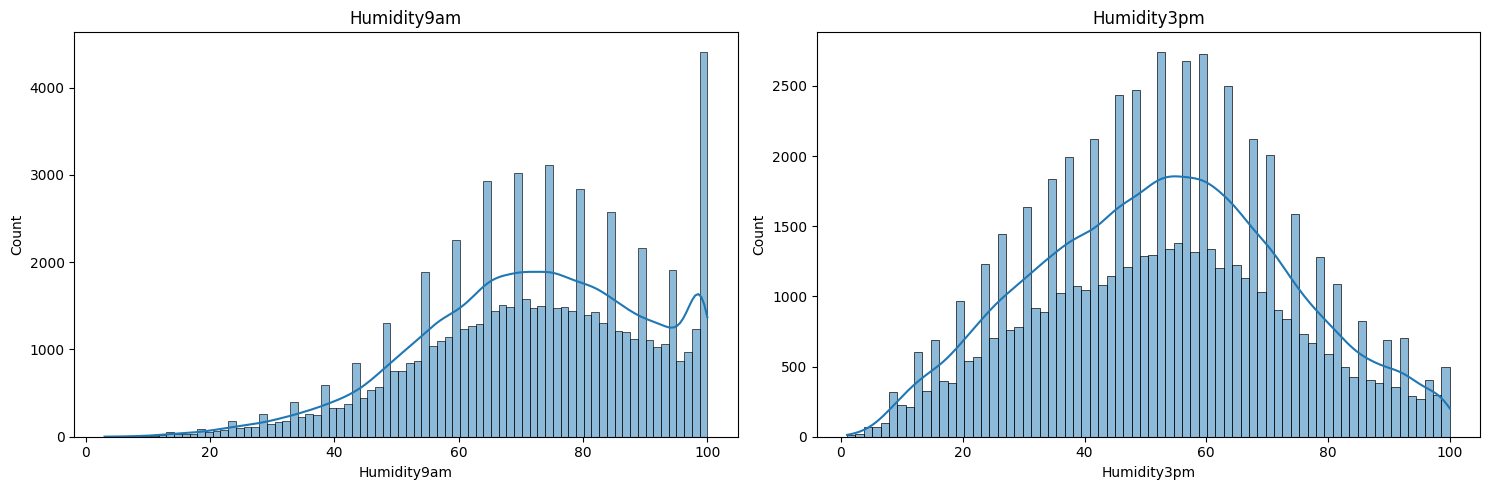

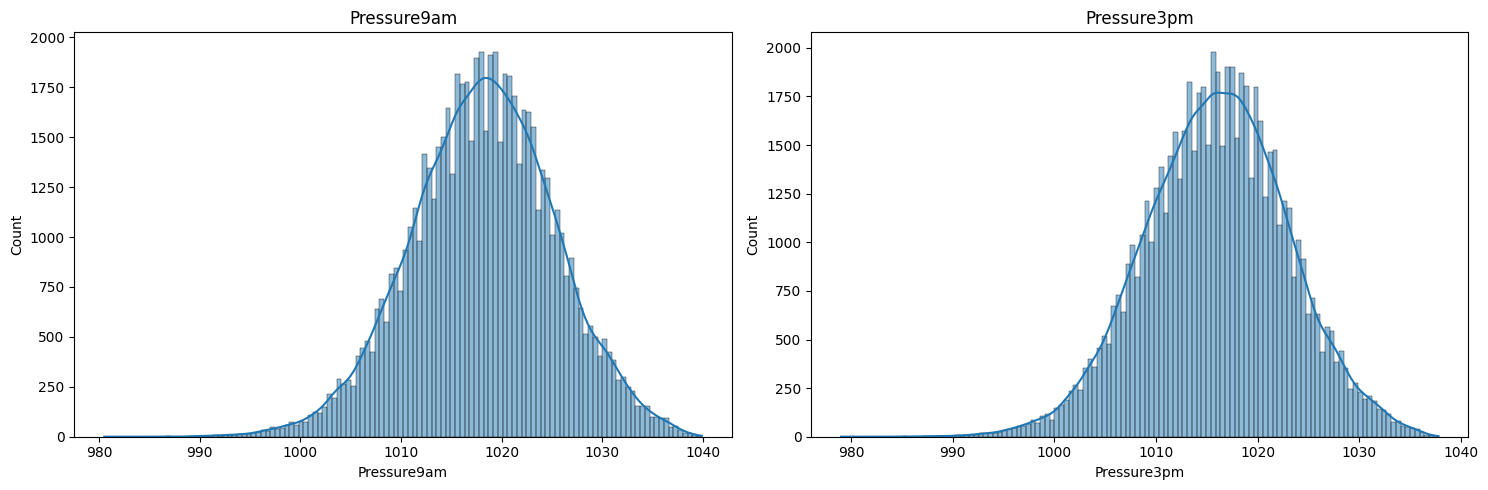

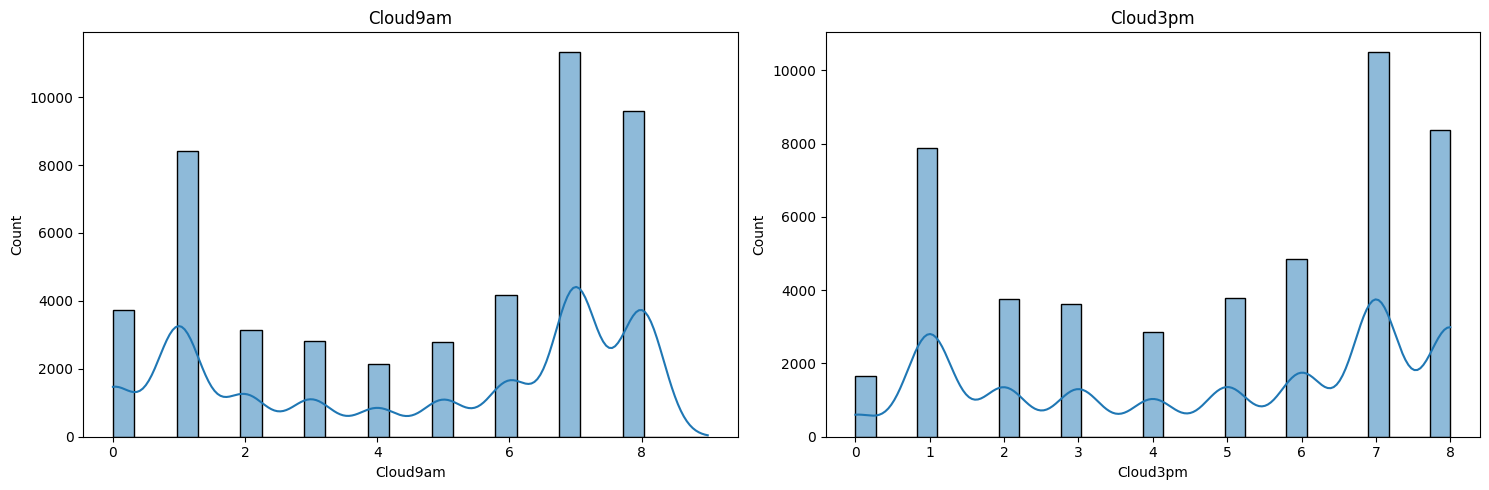

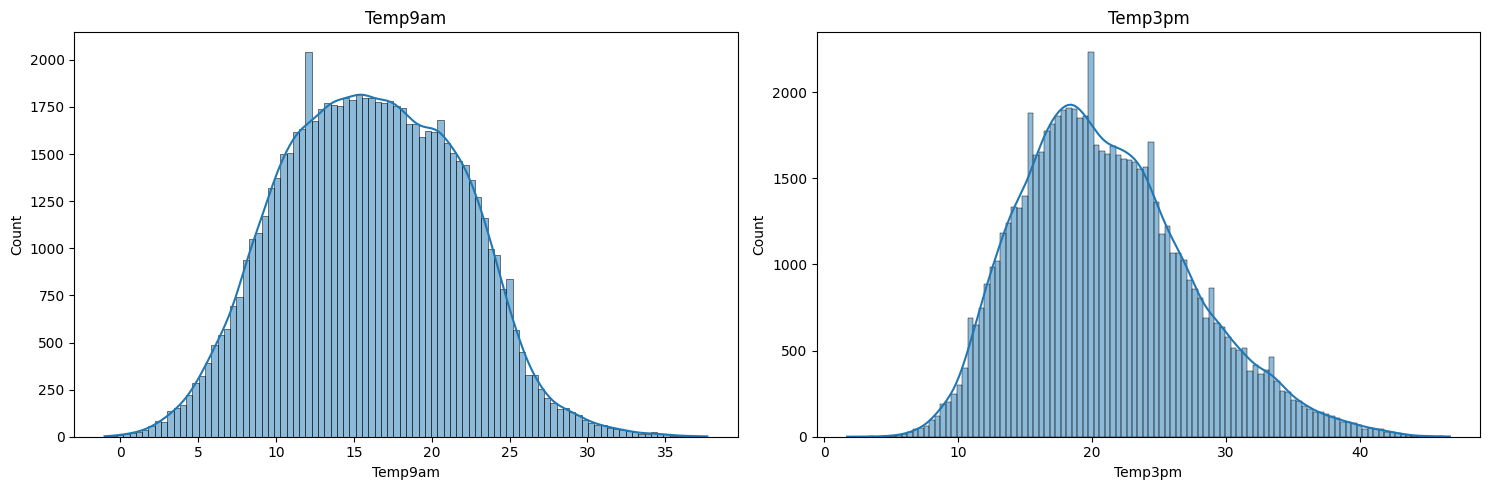

In [69]:
groups = [
    ['MinTemp', 'MaxTemp'],
    ['Rainfall', 'Evaporation', 'Sunshine'],
    ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'],
    ['Humidity9am', 'Humidity3pm'],
    ['Pressure9am', 'Pressure3pm'],
    ['Cloud9am', 'Cloud3pm'],
    ['Temp9am', 'Temp3pm']
]

for group in groups:
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(group, 1):
        plt.subplot(1, len(group), i)
        sns.histplot(df_weather[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()

In [70]:
df_weather["Date"] = pd.to_datetime(df_weather["Date"])
df_weather = df_weather.sort_values('Date')

Text(0.5, 1.0, 'Temperatura mínima y máxima en función del tiempo')

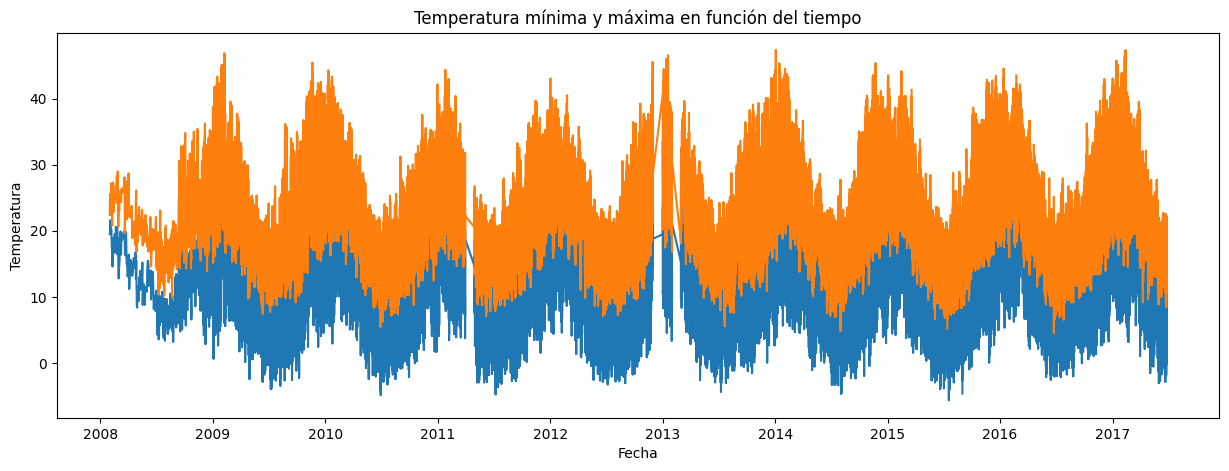

In [71]:
plt.figure(figsize=(15, 5))
plt.plot(df_weather['Date'], df_weather['MinTemp'], label='MinTemp')
plt.plot(df_weather['Date'], df_weather['MaxTemp'], label='MaxTemp')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.title('Temperatura mínima y máxima en función del tiempo')


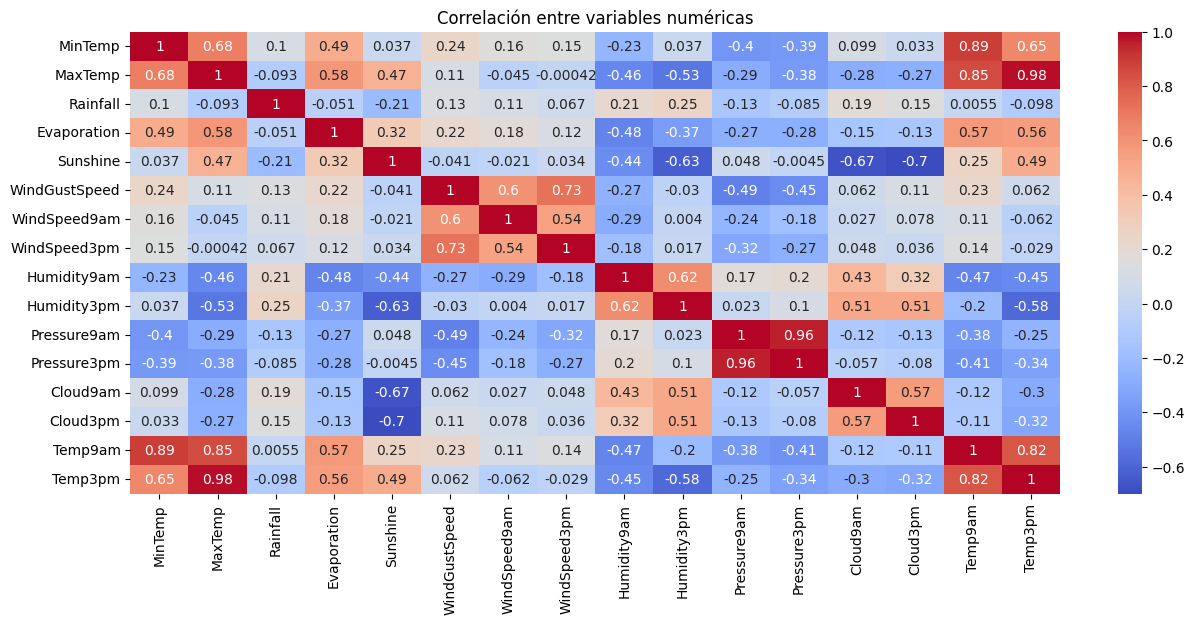

In [72]:
plt.figure(figsize=(15, 6))
sns.heatmap(df_weather[numerical].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.show()

In [73]:
# sns.pairplot(df_weather[numerical])

# Datos Faltantes

## Variables Categóricas

- Cantidad de datos faltantes

In [74]:
df_weather[categorical].isnull().sum()[df_weather[categorical].isnull().sum() > 0]

WindGustDir     5547
WindDir9am      6286
WindDir3pm      2430
RainToday       2123
RainTomorrow    2121
dtype: int64

- Porcentaje de datos faltantes

In [75]:
df_weather[categorical].isnull().sum()[df_weather[categorical].isnull().sum() > 0] / df_weather.shape[0] * 100

WindGustDir     7.446437
WindDir9am      8.438490
WindDir3pm      3.262095
RainToday       2.849970
RainTomorrow    2.847286
dtype: float64

Eliminar las filas donde ``RainTomorrow`` es nulo.

Problemas con la imputación de variables objetivo:
   - Sesgo: Imputar la variable objetivo puede introducir un sesgo en el modelo, ya que estaríamos "adivinando" los valores que queremos predecir.
   - Fuga de datos: Si usamos información de otras variables para imputar 'RainTomorrow', podríamos estar introduciendo información que el modelo no debería tener al hacer predicciones reales.
   - Evaluación incorrecta: Al evaluar el modelo, estaríamos midiendo su rendimiento en parte sobre datos imputados, lo que no reflejaría su verdadera capacidad predictiva.

In [76]:
df_weather = df_weather.dropna(subset=['RainTomorrow'])

Imputación para Variables de Viento Relacionadas.

Ya que las columnas `WindGustDir`, `WindDir9am` y `WindDir3pm` representan la dirección del viento en distintos momentos del día, usamos los valores disponibles de una columna para imputar los faltantes en otra, aprovechando la continuidad y la consistencia que suele haber en las direcciones del viento a lo largo de un mismo día.

Proceso  imputación:

1. Imputar `WindGustDir` usando `WindDir9am` y `WindDir3pm`: Si falta `WindGustDir`, intenta rellenar con `WindDir9am`, y si no está disponible, usa `WindDir3pm`.
2. Imputar `WindDir9am` usando `WindDir3pm`: Si falta `WindDir9am`, rellena con `WindDir3pm` si está disponible.
3. Imputar `WindDir3pm` usando `WindDir9am`: Si falta `WindDir3pm`, rellena con `WindDir9am` si está disponible.
4. Finalmente, usa la moda para cualquier valor faltante restante.


In [77]:
df_weather['WindGustDir'] = df_weather['WindGustDir'].fillna(df_weather['WindDir9am'])
df_weather['WindGustDir'] = df_weather['WindGustDir'].fillna(df_weather['WindDir3pm'])

# Imputar WindDir9am usando WindDir3pm
df_weather['WindDir9am'] = df_weather['WindDir9am'].fillna(df_weather['WindDir3pm'])

# Imputar WindDir3pm usando WindDir9am
df_weather['WindDir3pm'] = df_weather['WindDir3pm'].fillna(df_weather['WindDir9am'])

# Rellenar cualquier valor restante con la moda
for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    df_weather[col] = df_weather[col].fillna(df_weather[col].mode()[0])


Para RainToday: Impuntamos con la moda

In [78]:
df_weather['RainToday'] = df_weather['RainToday'].fillna(df_weather['RainToday'].mode()[0])

## Variables Numéricas

- Cantidad de datos faltantes.

In [79]:
df_weather[numerical].isnull().sum()[df_weather[numerical].isnull().sum() > 0]

MinTemp            386
MaxTemp            195
Rainfall           776
Evaporation      30989
Sunshine         37282
WindGustSpeed     5002
WindSpeed9am       698
WindSpeed3pm      1322
Humidity9am        817
Humidity3pm       1411
Pressure9am       6552
Pressure3pm       6511
Cloud9am         24928
Cloud3pm         25759
Temp9am            387
Temp3pm            995
dtype: int64

- Porcentaje de datos faltantes

In [80]:
numerical = df_weather.select_dtypes(include='number').columns

In [81]:
data_numerical_missing = df_weather[numerical].isnull().sum()[df_weather[numerical].isnull().sum() > 0] / df_weather.shape[0] * 100
data_numerical_missing

MinTemp           0.533363
MaxTemp           0.269445
Rainfall          1.072253
Evaporation      42.819638
Sunshine         51.515110
WindGustSpeed     6.911608
WindSpeed9am      0.964475
WindSpeed3pm      1.826699
Humidity9am       1.128905
Humidity3pm       1.949676
Pressure9am       9.053350
Pressure3pm       8.996698
Cloud9am         34.444736
Cloud3pm         35.592986
Temp9am           0.534745
Temp3pm           1.374860
dtype: float64

- Al tener columnas con un porcentaje de datos faltantes mayor al 30% se decide eliminarlas.

In [82]:
df_weather = df_weather.drop(columns=data_numerical_missing[data_numerical_missing > 30].index)

- Para las columnas "WindGustSpeed", "WindSpeed9am" y "WindSpeed3pm" se imputan los valores faltantes con KNNImputer.

In [83]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_weather[["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]])

# Imputar los valores faltantes
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_scaled)

# Desescalar
X_final = scaler.inverse_transform(X_imputed)

df_weather[["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]] = X_final

- Para las columnas con valores faltantes menores al $<5%$ se imputan con la media.

In [84]:
for col in data_numerical_missing[data_numerical_missing < 5].index:
    df_weather[col] = df_weather[col].fillna(df_weather[col].mean())

- Variables con un porcentaje moderado de valores faltantes (5%-10%)

imputamos "Pressure9am", "Pressure3pm"

In [33]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_weather[["Pressure9am", "Pressure3pm"]])

# Imputar los valores faltantes
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_scaled)

# Desescalar
X_final = scaler.inverse_transform(X_imputed)

df_weather[["Pressure9am", "Pressure3pm"]] = X_final

# Valores Atípicos

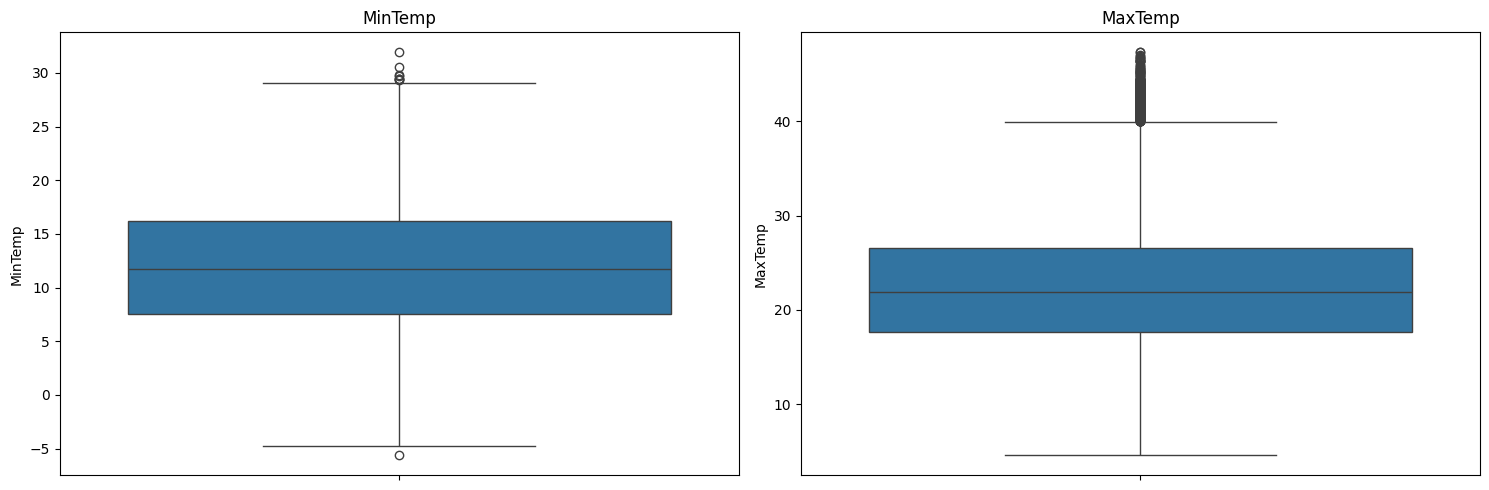

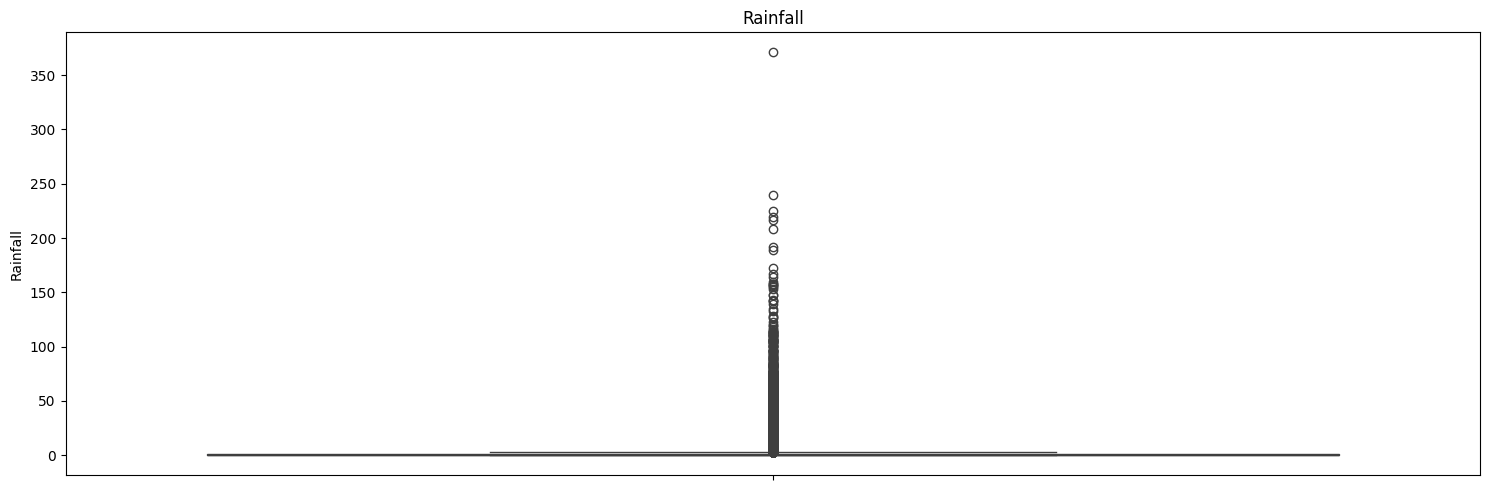

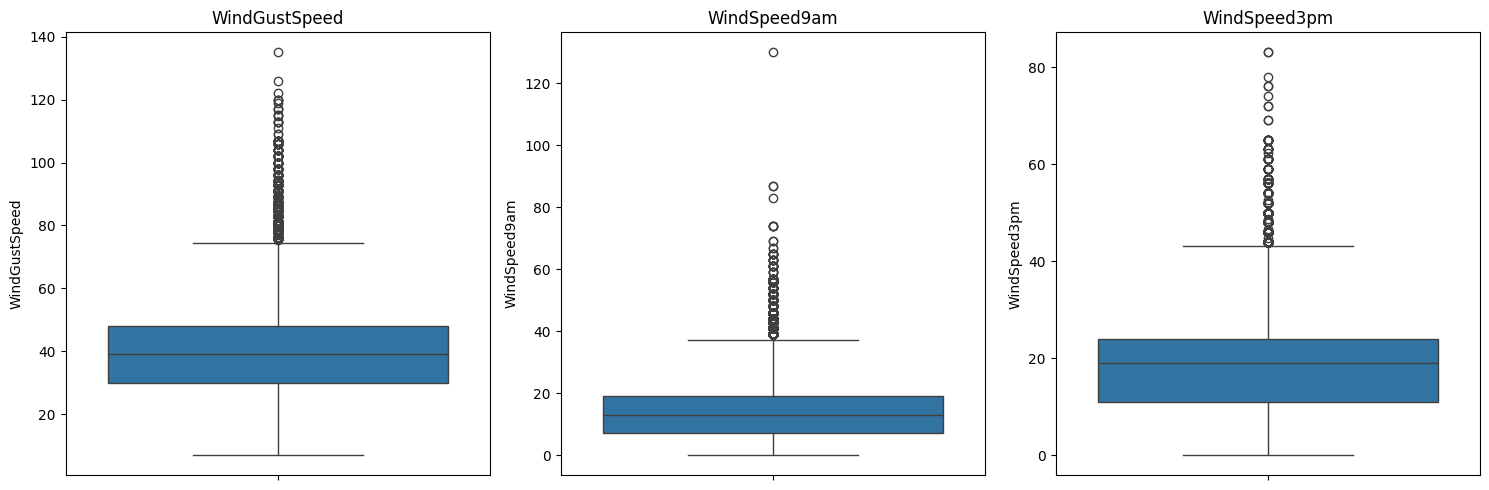

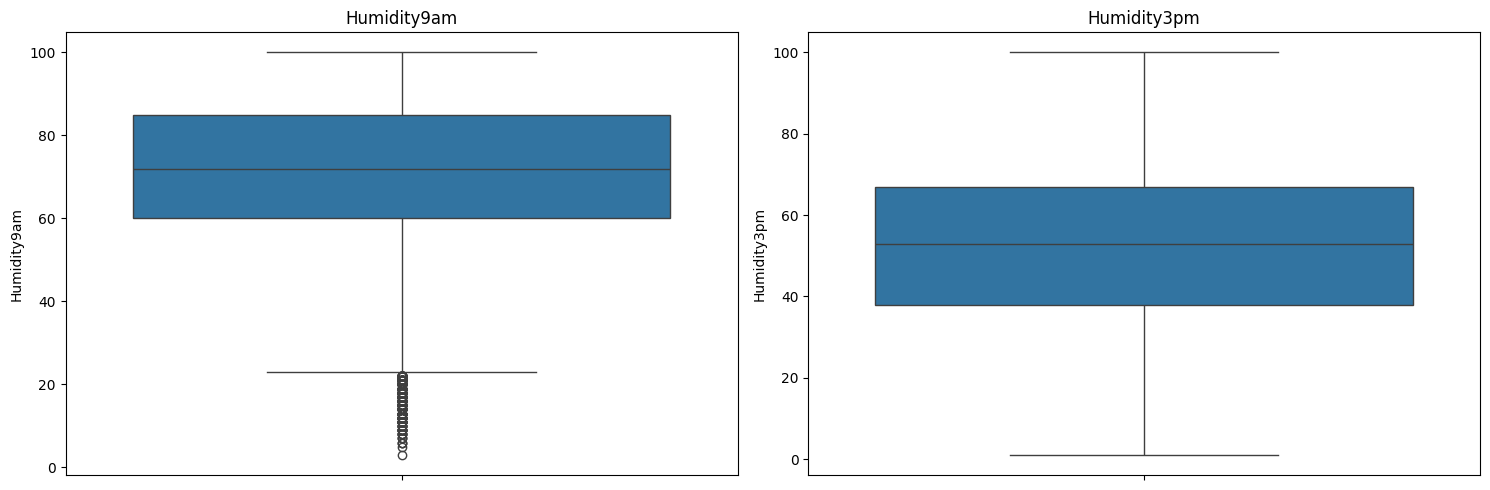

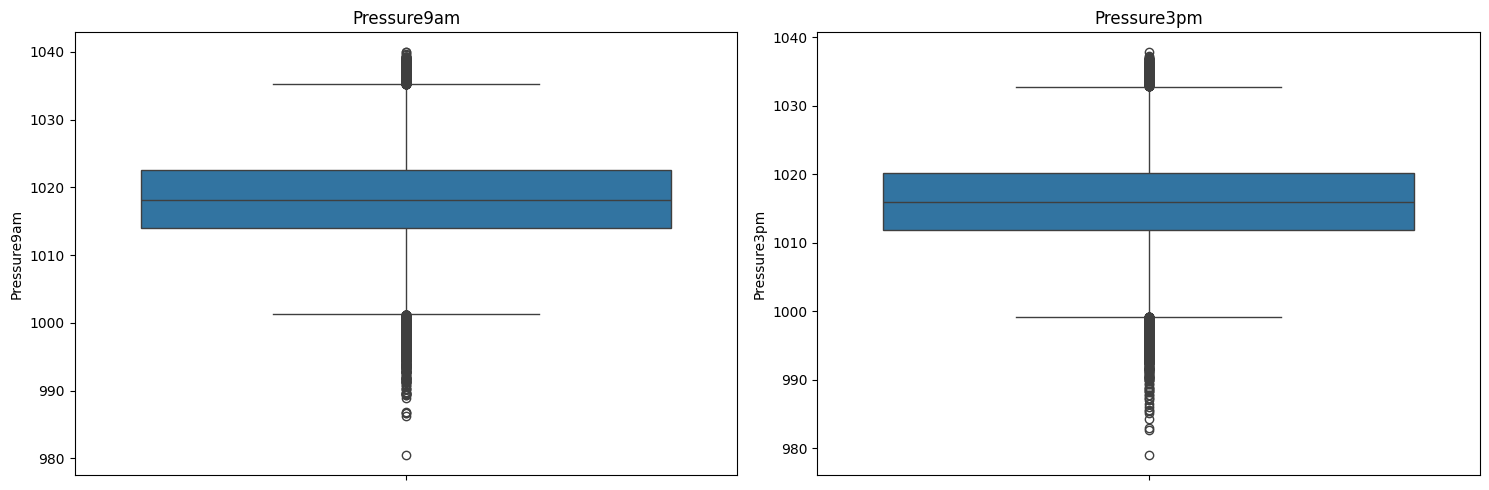

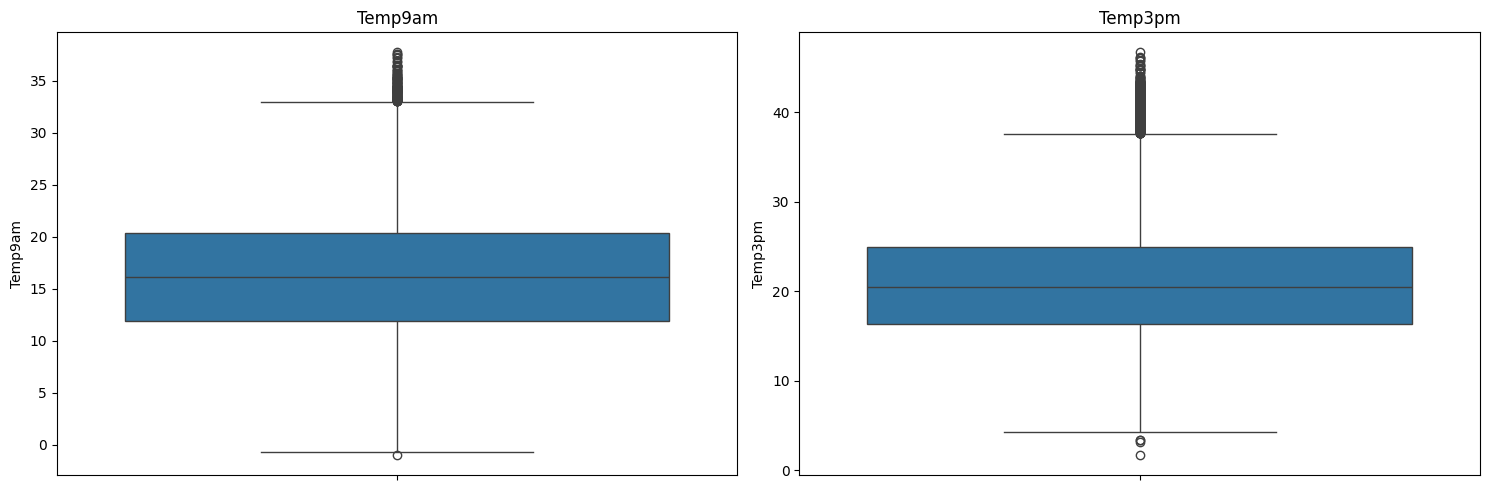

In [34]:
# Grafico de cajas
groups = [ 
    ['MinTemp', 'MaxTemp'],
    ['Rainfall'],
    ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'],
    ['Humidity9am', 'Humidity3pm'],
    ['Pressure9am', 'Pressure3pm'],
    ['Temp9am', 'Temp3pm']
]

for group in groups:
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(group, 1):
        plt.subplot(1, len(group), i)
        sns.boxplot(y=df_weather[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()


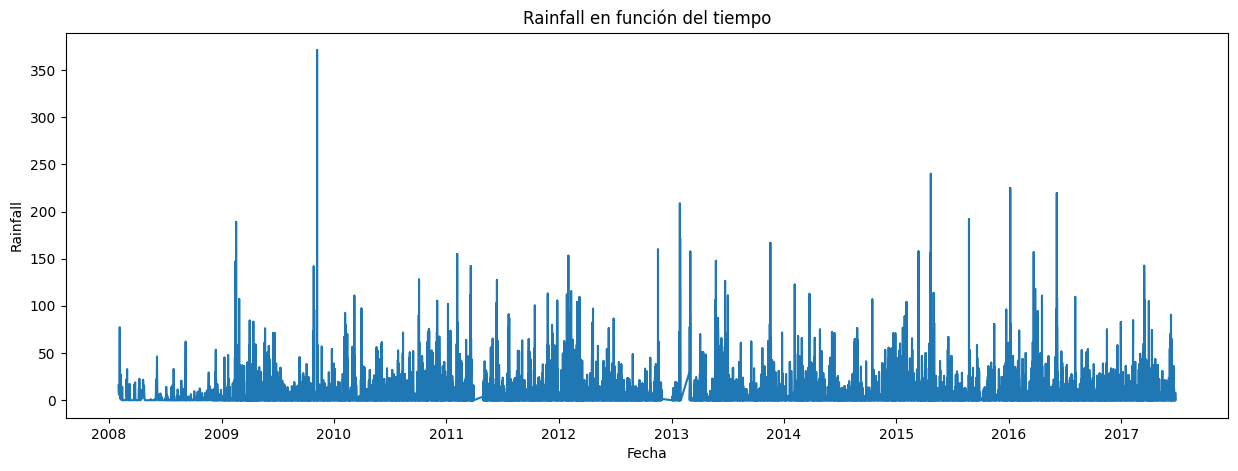

In [35]:
# Grafcmos raifall vs time
plt.figure(figsize=(15, 5))
plt.plot(df_weather['Date'], df_weather['Rainfall'])
plt.xlabel('Fecha')
plt.ylabel('Rainfall')
plt.title('Rainfall en función del tiempo')
plt.show()

In [36]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = np.where((data < lower_bound) | (data > upper_bound))
    return outliers

- Cantidad de valores atípicos en las variables numéricas.

In [37]:
outliers = pd.DataFrame(columns=['variable', 'cant outliers', 'porcentaje'])

for col in df_weather.select_dtypes(include='number').columns:
    outliers_idx = detect_outliers_iqr(df_weather[col])[0]
    if len(outliers_idx) > 0:
        outliers = pd.concat([outliers, pd.DataFrame({'variable': [col], 'cant outliers': [len(outliers_idx)], 'porcentaje': [len(outliers_idx) / df_weather.shape[0] * 100]})], ignore_index=True)

outliers.sort_values('porcentaje', ascending=False)

,variable,cant outliers,porcentaje
2,Rainfall,12052,16.653079
3,WindGustSpeed,1509,2.085089
7,Pressure9am,1239,1.712012
4,WindSpeed9am,1217,1.681613
8,Pressure3pm,1189,1.642923
5,WindSpeed3pm,903,1.247737
10,Temp3pm,840,1.160686
1,MaxTemp,711,0.982438
6,Humidity9am,486,0.671540
9,Temp9am,121,0.167194


# Feature Engineering

- convertimos la columna `Date` a tipo `datetime`

In [38]:
df_weather["Date"] = pd.to_datetime(df_weather["Date"])

In [39]:
df_weather["Year"] = df_weather["Date"].dt.year
df_weather["Month"] = df_weather["Date"].dt.month
df_weather["Day"] = df_weather["Date"].dt.day

In [40]:
df_weather.drop(columns=["Date"], inplace=True)

- Eliminamos las columnas que no aportan información relevante para la predicción.

In [41]:
df_weather.drop(columns=["Coordinates", "Region"], inplace=True)

- Convertimos a category

In [42]:
categorical = df_weather.select_dtypes(include='category').columns
categorical

Index([], dtype='object')

In [43]:
df_weather["Location"] = df_weather["Location"].astype('category')
df_weather["WindGustDir"] = df_weather["WindGustDir"].astype('category')
df_weather["WindDir9am"] = df_weather["WindDir9am"].astype('category')
df_weather["WindDir3pm"] = df_weather["WindDir3pm"].astype('category')
df_weather["RainToday"] = df_weather["RainToday"].astype('category')
df_weather["RainTomorrow"] = df_weather["RainTomorrow"].astype('category')

# Modelo 1: Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from category_encoders import BinaryEncoder

In [45]:
X = df_weather.drop(['RainTomorrow'], axis=1)

y = df_weather['RainTomorrow']

In [46]:
# dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Encodeamos las variables categóricas

In [47]:
categorical = X.select_dtypes(include='category').columns

encoder = BinaryEncoder(cols=categorical)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

- Creamos un modelo de árbol de decisión.

In [48]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

tree_model.fit(X_train, y_train)

# predecimos
y_pred = tree_model.predict(X_test)

# calculamos la exactitud
accuracy_score(y_test, y_pred)

0.8339896373056995

In [49]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[10773,   438],
       [ 1965,  1299]], dtype=int64)

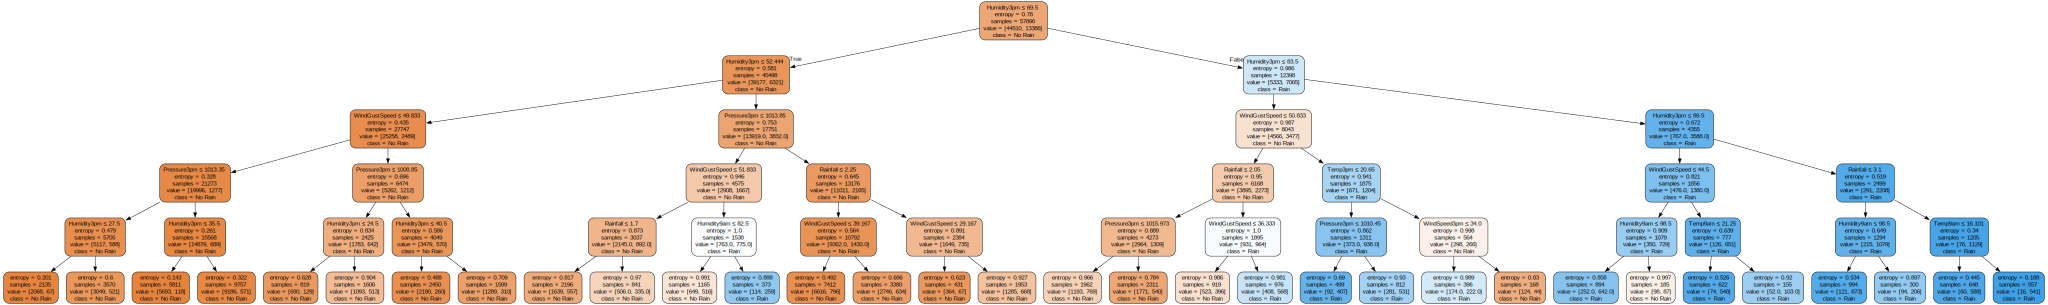

In [52]:
# Graficamos el árbol de decisión
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(tree_model, out_file=None,
                                feature_names=X_train.columns,
                                class_names=['No Rain', 'Rain'],
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph


# Modelo 2: Random Forest